# Face Emotion Detection

## Hyperparameter Tuning of FaceNet Representations and SVM Classification


This notebook outlines the procedures and methods utilized for hyperparameter tuning of classification using Support Vector Machines (SVM) for FaceNet representations. The primary goal of this analysis is to optimize the model parameters to enhance the accuracy and efficiency of face recognition tasks. 

### Imports

In [1]:
import pandas as pd
import pickle
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

We are using pre-existing split models, eliminating the need for further preprocessing. This approach involves importing data that has already been preprocessed.

In [2]:
df_train_fn = pd.read_csv("/Users/aishwaryakumar/Downloads/train.csv", header=None)
df_train_fn.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,-0.091919,0.051916,0.001943,-0.027426,-0.048226,-0.031526,0.035893,0.001505,0.021026,0.045596,...,-0.010724,0.093988,0.048333,-0.048847,0.043909,0.018085,-0.026448,-0.006909,0.020144,happy
1,0.009113,0.085887,-0.001893,0.043528,-0.001382,-0.017093,-0.031315,0.083984,-0.038360,-0.085567,...,-0.079466,0.027998,-0.025072,-0.007709,0.010076,0.007181,0.050801,0.084473,0.033736,happy
2,0.044390,0.002805,0.013761,0.071790,0.055609,-0.022597,-0.019615,0.033794,0.009900,0.010250,...,-0.086477,0.007052,0.026665,0.006389,0.028322,0.028942,-0.088447,-0.012365,0.033491,happy
3,0.038794,0.061560,0.047144,-0.017209,0.006046,-0.043545,0.061967,-0.030304,0.040174,-0.062387,...,0.015691,-0.033446,0.097108,0.058203,0.009818,-0.037475,-0.085136,-0.010002,0.004558,happy
4,-0.024505,-0.009263,0.030885,-0.030105,-0.059966,0.035133,0.036233,0.017152,0.017891,0.047850,...,0.084461,-0.007915,-0.035262,-0.043570,-0.000492,0.054782,0.038444,-0.130300,-0.010125,happy


In [3]:
le = LabelEncoder()
X_train_fn = df_train_fn.iloc[:, :-1].to_numpy()  # Features
y_train_fn = le.fit_transform(df_train_fn.iloc[:, -1]) # Target

label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(label_mapping)

{'  angry': 0, '  disgusted': 1, '  fearful': 2, '  happy': 3, '  neutral': 4, '  sad': 5, '  surprised': 6}


Employed a Support Vector Machine (SVM) classifier to optimize face recognition performance, leveraging a grid search approach to fine-tune the hyperparameters.


We initialized the SVM with a random state of 42 to ensure the consistency of our results across different runs. The grid search was configured with a comprehensive set of potential values for the hyperparameters: 
the regularization parameter 'C' was tested at three levels (1, 10, 100), 
the 'gamma' parameter, which influences the impact of individual training samples, 
was evaluated at three scales (0.01, 0.1, 1),
and three distinct kernel functions ('rbf', 'poly', 'sigmoid') were considered to determine the optimal decision boundary shape. 

This optimization process was carried out using a 4-fold cross-validation scheme to validate the effectiveness of each parameter combination, ensuring robustness and generalizability of the model. The optimal set of parameters obtained from the grid search was then applied to train the SVM on the preprocessed training dataset, aiming to achieve the highest accuracy in facial recognition.

In [4]:
# Loading the classification
svc = svm.SVC(random_state=42)

# Using grid search to tune for the best parameters
parameters_grid = {
    'C': [ 1, 10, 100], 
    'gamma':[0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Performing grid search and cross validating it 10 times. 
grid_search = GridSearchCV(svc, parameters_grid, cv=4, scoring='accuracy',n_jobs=-1, return_train_score=True)

#Training the model
grid_search.fit(X_train_fn, y_train_fn)

GridSearchCV(cv=4, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             return_train_score=True, scoring='accuracy')

In [5]:
print(grid_search.best_params_)
svcmodel = grid_search.best_estimator_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In the optimization process, the grid search identified the most effective combination of hyperparameters for the SVM classifier as follows: regularization parameter  C set to 10, gamma parameter  γ set to 1, and the radial basis function (rbf) kernel. This particular configuration emerged as optimal for enhancing the classifier's accuracy in facial recognition tasks. The choice of a higher C value indicates a preference for a lower margin of error on the training set, while the γ value of 1 suggests a more complex model that captures finer distinctions in the data. The use of the rbf kernel supports non-linear decision boundaries, which are essential for handling the complexities inherent in facial recognition. 

In [6]:
print(grid_search.best_score_)

0.546797239121768


In [7]:
print(grid_search.cv_results_)

{'mean_fit_time': array([ 482.99156743,  463.75927275,  470.77567536,  367.84680474,
        475.12517577,  394.05758929,  359.00894684,  835.25054246,
        330.02326602,  379.20626497, 2295.90032309, 1096.01787007,
        464.98785001,  522.54463935,  371.44600075,  613.51268816,
        561.83958203,  497.0950982 ,  394.19354939,  447.85370827,
        358.14760417,  385.66693401,  439.27726227,  438.13832158,
        614.77135497,  580.23879856,  179.44811302]), 'std_fit_time': array([9.91547533e-01, 1.88346038e-01, 1.16531373e+00, 1.12972392e+00,
       4.55093527e-01, 1.46874812e+00, 9.83287493e-01, 7.87784318e-01,
       2.95430585e+00, 4.76666772e-01, 1.49208770e+00, 4.49565064e+02,
       8.64790944e-01, 1.05429731e+00, 1.03775798e+00, 1.68667884e+01,
       7.59110316e+00, 1.05713879e+01, 8.56998153e-01, 2.03347469e+00,
       8.06478134e-01, 1.90967505e+00, 1.25460901e+00, 1.49169521e+00,
       5.92352985e+00, 9.53096446e+00, 4.50016614e+00]), 'mean_score_time': array([1

In [8]:
with open("/Users/aishwaryakumar/Desktop/CS 6140 Machine Learning/Project/model_svc_facenet_2.pkl", "wb") as f:
    pickle.dump(svcmodel, f)

y_train_predicted = svcmodel.predict(X_train_fn)

In [9]:
print("Training accuracy: ", accuracy_score(y_train_fn, y_train_predicted))

Training accuracy:  0.9852659444773416


In [10]:
df_test_fn = pd.read_csv("/Users/aishwaryakumar/Downloads/test.csv", header=None)
df_test_fn.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,-0.026437,0.071417,0.092250,-0.020436,0.068914,-0.085590,-0.047277,-0.022069,-0.015329,0.012672,...,-0.050109,0.054241,-0.017658,-0.047313,0.027707,0.004159,0.028107,0.029522,-0.015835,happy
1,0.010547,-0.012303,0.024871,-0.016956,0.054799,-0.012030,0.091366,0.001435,0.103500,-0.013168,...,0.014528,0.062060,-0.123882,-0.023988,-0.011324,0.026197,-0.016000,-0.031684,-0.025887,happy
2,0.074804,-0.039438,0.059720,0.013005,0.000054,0.054525,-0.034021,-0.096049,0.000984,0.008627,...,0.062467,0.072195,-0.063679,0.036140,-0.054468,-0.054542,0.024559,0.061786,-0.060105,happy
3,0.034196,0.044436,0.023843,-0.004037,-0.048426,-0.003144,-0.017279,-0.006708,0.092695,-0.006388,...,0.023160,-0.022248,0.013207,0.010202,-0.029117,-0.010440,0.057155,-0.048184,0.083865,happy
4,-0.033714,0.013179,-0.004578,0.020869,-0.013347,-0.071225,-0.007273,-0.001836,0.017192,-0.071982,...,0.081922,0.009118,-0.029588,0.049512,-0.052274,-0.026313,-0.026901,0.021228,0.018477,happy


In [11]:
X_test_fn = df_test_fn.iloc[:, :-1].to_numpy()  # Features
y_test_fn = le.fit_transform(df_test_fn.iloc[:, -1]) # Target

label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(label_mapping)

{'  angry': 0, '  disgusted': 1, '  fearful': 2, '  happy': 3, '  neutral': 4, '  sad': 5, '  surprised': 6}


In [12]:
y_predicted_fn = svcmodel.predict(X_test_fn)

In [13]:
print("Test accuracy: ", accuracy_score(y_test_fn, y_predicted_fn))

Test accuracy:  0.5792699916411257


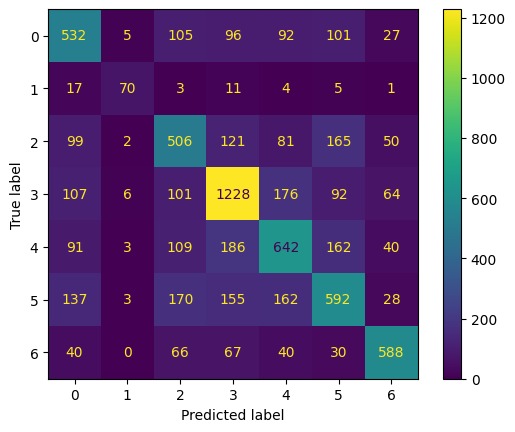

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_facenet = confusion_matrix(y_test_fn, y_predicted_fn, labels=svcmodel.classes_)
disp = ConfusionMatrixDisplay(cm_facenet, display_labels=svcmodel.classes_)
disp.plot()
plt.show()